In [84]:
# import pandas
import pandas as pd
import numpy as np
import datetime as dt
# import statsmodels.api as sm
import statsmodels.api as sm

# import matplotlib
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [85]:
# load data
data = sm.datasets.co2.load_pandas()
co2 = data.data

* print top 5 rows

In [86]:
co2

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
...,...
2001-12-01,370.3
2001-12-08,370.8
2001-12-15,371.2
2001-12-22,371.3


* Resample timeseries using monthly averages and store the new timeseries as a Series `y`

In [66]:
# Get month max, min and size (and as they are sorted - last and first)
monthly = co2.groupby([co2.index.year,co2.index.month])['co2'].agg(['mean'])

# Rename index cols
monthly.index = monthly.index.rename(['Year','Month'])
y = monthly['mean']

* print top 5 rows of 'y'

In [67]:
y[:5]

Year  Month
1958  3        316.100000
      4        317.200000
      5        317.433333
      6               NaN
      7        315.625000
Name: mean, dtype: float64

* check the missing values

In [70]:
y.isnull().sum()

5

* replace missing values with last available value
    - if Feb 2010 is missing, use value from Jan 2010.

In [71]:
y.fillna(method='ffill', inplace = True)

* plot timeseries `y`

In [83]:
temp = list(y)

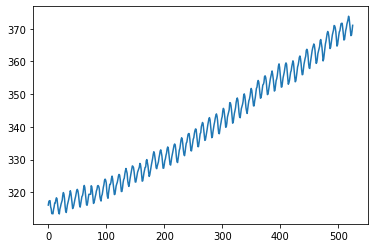

In [74]:
plt.plot(temp)

* Apply and plot:
    - additive seasonal decomposition
    - multiplicative seasonal decomposition

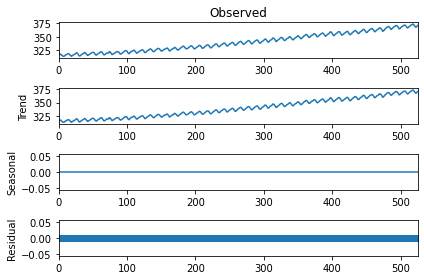

In [80]:
result = seasonal_decompose(temp, model='additive', period=1)
result.plot()
plt.show()

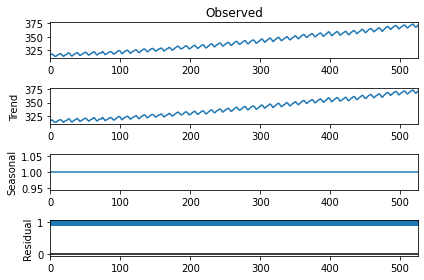

In [81]:
result = seasonal_decompose(temp, model='multiplicative', period=1)
result.plot()
plt.show()